<a href="https://colab.research.google.com/github/F1ame21/Primat_Labs/blob/main/lab2/FletcherReeves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.misc import derivative
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from numpy import arange
from numpy import meshgrid
from matplotlib import pylab, gridspec, pyplot as plt
from random import *
import math
import sympy

In [ ]:
def golden_ratio(func , a = 0, b = 1, e = 0.00001):
  golden_ratio_value_1 = (3 - np.sqrt(5)) / 2
  golden_ratio_value_2 = 1 - golden_ratio_value_1

  x_1 = a + golden_ratio_value_1 * (b - a)
  x_2 = a + golden_ratio_value_2 * (b - a)

  x_1_value = func(x_1)
  x_2_value = func(x_2)
  while (b - a)  > e:
    if x_1_value < x_2_value:
      b = x_2
      x_2 = x_1
      x_2_value = x_1_value
      x_1 = a + golden_ratio_value_1 * (b - a)
      x_1_value = func(x_1)
    elif x_1_value > x_2_value:
      a = x_1
      x_1 = x_2
      x_1_value = x_2_value
      x_2 = a + golden_ratio_value_2 * (b - a)
      x_2_value = func(x_2)
  return (a+b)/2

In [152]:
def plot():
  a = -5
  b = 5
  # с видом сверху
  fig, ax = plt.subplots()
  p = ax.get_position()
  xaxis = arange(a, b, 0.1)
  yaxis = arange(a, b, 0.1)
  # создаем сетку
  x, y = meshgrid(xaxis, yaxis)
  results = f(x, y)
  plt.contour(xaxis, yaxis, results)
  line, = plt.plot([], color='black')
  ax.scatter(steps[:, 0], steps[:, 1], steps[:, 2],linestyle="-", marker=".", linewidth=1,c='red')
  plt.plot(steps[:, 0],steps[:, 1], color = 'red')

In [172]:
def f(x, y):
  return  7*x**2 + 2*y**2 + 2*x*y + 9*x + 3*y
# вычисление производной
def derivative(xn, yn):
  x = symbols('x')
  y = symbols('y')
  derivative_x = diff(f(x, y), x)
  derivative_y = diff(f(x, y), y)
  derivative_fx = derivative_x.evalf(subs={x:xn,y:yn})
  derivative_fy = derivative_y.evalf(subs={y:yn,x:xn})
  return derivative_fx, derivative_fy
steps = []
def FletcherReeves(xn, yn, accuracy = 0.00001, n = 4):
  steps.append([xn, yn, f(xn, yn)])
  xn_pred = 1; yn_pred = 0
  for i in range(n):
    derivative_fxn_pred, derivative_fyn_pred = derivative(xn_pred, yn_pred)
    derivative_fxn, derivative_fyn = derivative(xn, yn)
    if (abs(derivative_fxn) < accuracy) and (abs(derivative_fyn) < accuracy):
      break
    if i == 0:
      alpha = golden_ratio(lambda a: f(xn - a * derivative_fxn, yn - a * derivative_fyn))
      xn_pred = xn
      yn_pred = yn
      xn = xn - alpha * derivative_fxn
      yn = yn - alpha * derivative_fyn
      steps.append([xn, yn, f(xn, yn)])
    else:
      b = (sqrt(derivative_fxn ** 2 + derivative_fyn ** 2) ** 2) / (sqrt(derivative_fxn_pred ** 2 + derivative_fyn_pred ** 2) ** 2)
      d1 = derivative_fxn + b * derivative_fxn_pred
      d2 = derivative_fyn + b * derivative_fyn_pred
      xn_pred = xn
      yn_pred = yn
      alpha = golden_ratio(lambda a: f(xn_pred - a * d1, yn_pred - a * d2))
      xn = xn_pred - alpha * d1
      yn = yn_pred - alpha * d2
      xn = round(xn, 4)
      yn = round(yn, 4)
      xn_pred = round(xn, 4)
      yn_pred = round(yn, 4)
      steps.append([xn, yn, f(xn, yn)])
    if abs(xn_pred - xn) < accuracy and abs(yn_pred - yn) < accuracy:
      print(f"Number of iterations - {i}")
      break
  return print(xn, yn), steps
FletcherReeves(xn = 3, yn = 3)
steps = np.array(steps)
steps = steps.astype(float)

Number of iterations - 1
-0.5771 -0.4616


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


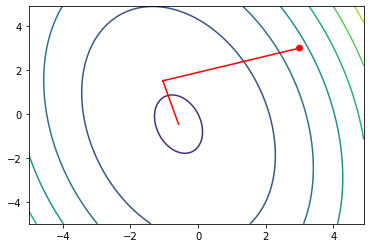

In [169]:
plot()